In [ ]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
dist = ctrl.Antecedent(np.arange(0,5,1),'distance from signal')
sig = ctrl.Antecedent(np.arange(0,3,0.5),'signal light')
spd = ctrl.Consequent(np.arange(0,120,2),'speed of train')

In [ ]:
dist['d0'] = fuzz.trimf(dist.universe,[0,0,1])
dist['d1'] = fuzz.trimf(dist.universe,[0,1,2])
dist['d2'] = fuzz.trimf(dist.universe,[1,2,3])
dist['d3'] = fuzz.trimf(dist.universe,[2,3,4])
dist['d4'] = fuzz.trimf(dist.universe,[3,4,4])


sig['red'] = fuzz.trimf(sig.universe,[0,0,1.2])
sig['yellow'] = fuzz.trimf(sig.universe,[0.8,1.5,2.2])
sig['green'] = fuzz.trimf(sig.universe,[1.8,2.5,3])


spd['s0'] = fuzz.trimf(spd.universe,[0,0,2])
spd['s1'] = fuzz.trimf(spd.universe,[2,11,20])
spd['s2'] = fuzz.trimf(spd.universe,[20,40,60])
spd['s3'] = fuzz.trimf(spd.universe,[40,60,80])
spd['s4'] = fuzz.trimf(spd.universe,[70,90,120])

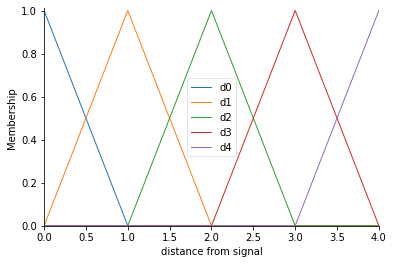

In [ ]:
dist.view()

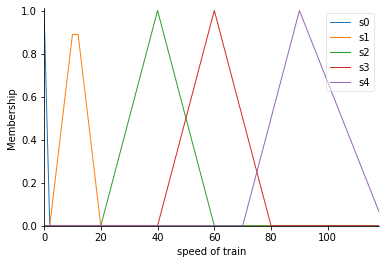

In [ ]:
spd.view()

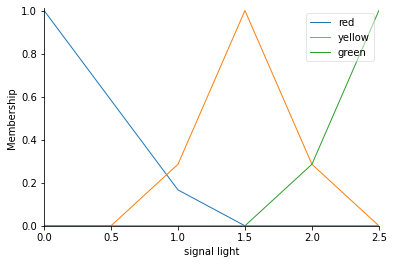

In [ ]:
sig.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad96f011d0>)

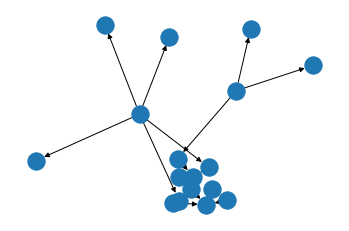

In [ ]:
r1 = ctrl.Rule(antecedent = dist['d3'] & sig['red'],consequent=spd['s1'])
r2 = ctrl.Rule(antecedent = dist['d2'] & sig['red'],consequent=spd['s0'])
r3 = ctrl.Rule(antecedent = dist['d1'] & sig['red'],consequent=spd['s0'])
r4 = ctrl.Rule(antecedent = dist['d0'] & sig['red'],consequent=spd['s0'])
r5 = ctrl.Rule(antecedent = dist['d3'] & sig['yellow'],consequent=spd['s2'])
r6 = ctrl.Rule(antecedent = dist['d2'] & sig['yellow'],consequent=spd['s2'])
r7 = ctrl.Rule(antecedent = dist['d1'] & sig['yellow'],consequent=spd['s1'])
r8 = ctrl.Rule(antecedent = dist['d3'] & sig['green'],consequent=spd['s4'])
r9 = ctrl.Rule(antecedent = dist['d2'] & sig['green'],consequent=spd['s4'])
r10= ctrl.Rule(antecedent = dist['d1'] & sig['green'],consequent=spd['s3'])

ctrl.Rule()
r1.view()

In [ ]:
spd_ctrl = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10])
spding = ctrl.ControlSystemSimulation(spd_ctrl)

In [ ]:
spding.input['distance from signal'] = 2.6
spding.input['signal light'] = 2.2
spding.compute()

81.03348355038118


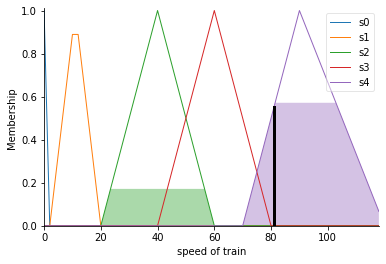

In [ ]:
print(spding.output['speed of train'])
spd.view(sim=spding)

In [ ]:
import pandas as pd

In [ ]:
clr = np.linspace(0,2.5,30)


In [ ]:
clr

array([0.        , 0.0862069 , 0.17241379, 0.25862069, 0.34482759,
       0.43103448, 0.51724138, 0.60344828, 0.68965517, 0.77586207,
       0.86206897, 0.94827586, 1.03448276, 1.12068966, 1.20689655,
       1.29310345, 1.37931034, 1.46551724, 1.55172414, 1.63793103,
       1.72413793, 1.81034483, 1.89655172, 1.98275862, 2.06896552,
       2.15517241, 2.24137931, 2.32758621, 2.4137931 , 2.5       ])

In [ ]:
dt = np.linspace(0,3.85,30)
dt

array([0.        , 0.13275862, 0.26551724, 0.39827586, 0.53103448,
       0.6637931 , 0.79655172, 0.92931034, 1.06206897, 1.19482759,
       1.32758621, 1.46034483, 1.59310345, 1.72586207, 1.85862069,
       1.99137931, 2.12413793, 2.25689655, 2.38965517, 2.52241379,
       2.65517241, 2.78793103, 2.92068966, 3.05344828, 3.1862069 ,
       3.31896552, 3.45172414, 3.58448276, 3.71724138, 3.85      ])

In [ ]:
dt[2]

0.2655172413793104

In [ ]:
l=[]
for i in range(0,30):
  spding.input['distance from signal'] = dt[i]
  spding.input['signal light'] = clr[i]
  spding.compute()
  l.append(spding.output['speed of train'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
speed_arr = np.array(l)

In [ ]:
clr = pd.Series(clr)
dt = pd.Series(dt)
speed_arr = pd.Series(speed_arr)

In [ ]:
speed_arr.shape

(10,)

In [ ]:
data = {'distance':dt,'color':clr,'speed':speed_arr}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,distance,color,speed
0,0.000000,0.000000,0.666667
1,0.132759,0.086207,0.677039
2,0.265517,0.172414,0.703805
3,0.398276,0.258621,0.742295
4,0.531034,0.344828,0.766478


In [ ]:
df.describe()

,distance,color,speed
count,30.000000,30.000000,30.000000
mean,1.925000,1.250000,39.205153
std,1.168728,0.758915,29.506799
min,0.000000,0.000000,1.666667
25%,0.962500,0.625000,9.244669
50%,1.925000,1.250000,37.520822
75%,2.887500,1.875000,60.954412
max,3.850000,2.500000,93.241379


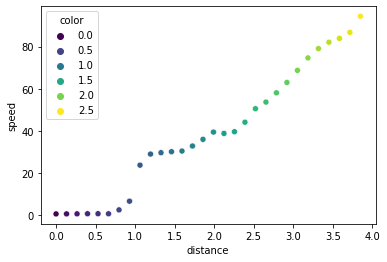

In [ ]:
sns.scatterplot(x='distance',y='speed',data=df,hue='color',palette='viridis')